## Name : <span style='color:#324587'>SK ASIF ALI</span>
## Role :  <span style='color:#659478'> Intern At The Sparks Foundation </span>
## Function : <span style='color:#328578'>  Data Science and Bussiness Analytics (January 2021)

## <span style='color:#C34A36'> Problem Statement </span>   : #Task2 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

<img src="iris.png" height="100" />


## <span style='color:##189AB4'> Importing the Necessary Libraries

In [82]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sns.set()

## <span style='color:#845EC2'>Importing the Data From CSV File </span>

In [83]:
df=pd.read_csv('Iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## <span style='color:#2D8BA8'> Statistical Description of the dataframe : - </span>


In [84]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
df.shape

(150, 5)

## <span style='color:#009EFA'> Slicing the Dataset to get Features,Omitting the Species column

In [85]:

input=df.iloc[:,:4].values
input

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## <span style='color:#B25B00'> Count Different Types of iris Flowers Species

In [86]:
iris_outcome = pd.crosstab(index=df["Species"],columns="count")
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## <span style='color:#FF8066'> Basically there are three types of species of iris flowers.so we need to plot the distribution plot for each of them in Four Different Characteristics

In [87]:
iris_setosa=df[df['Species']=='Iris-setosa']
iris_verginica=df[df['Species']=='Iris-verginica']
iris_versicolor=df[df['Species']=='Iris-versicolor']

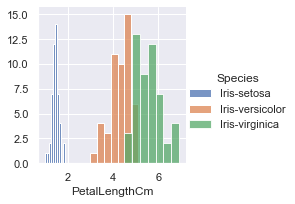

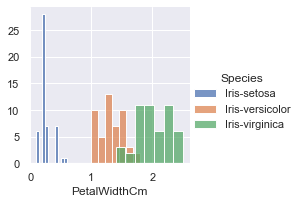

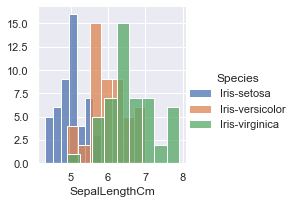

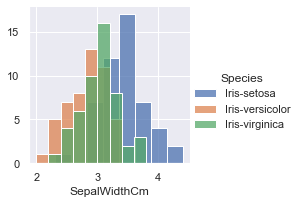

In [88]:
sns.FacetGrid(df,hue="Species",height=3).map(sns.histplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.histplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.histplot,"SepalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.histplot,"SepalWidthCm").add_legend()

plt.show()

## <span style='color:#BE93FD'>Pairwise Relationship between Dataset

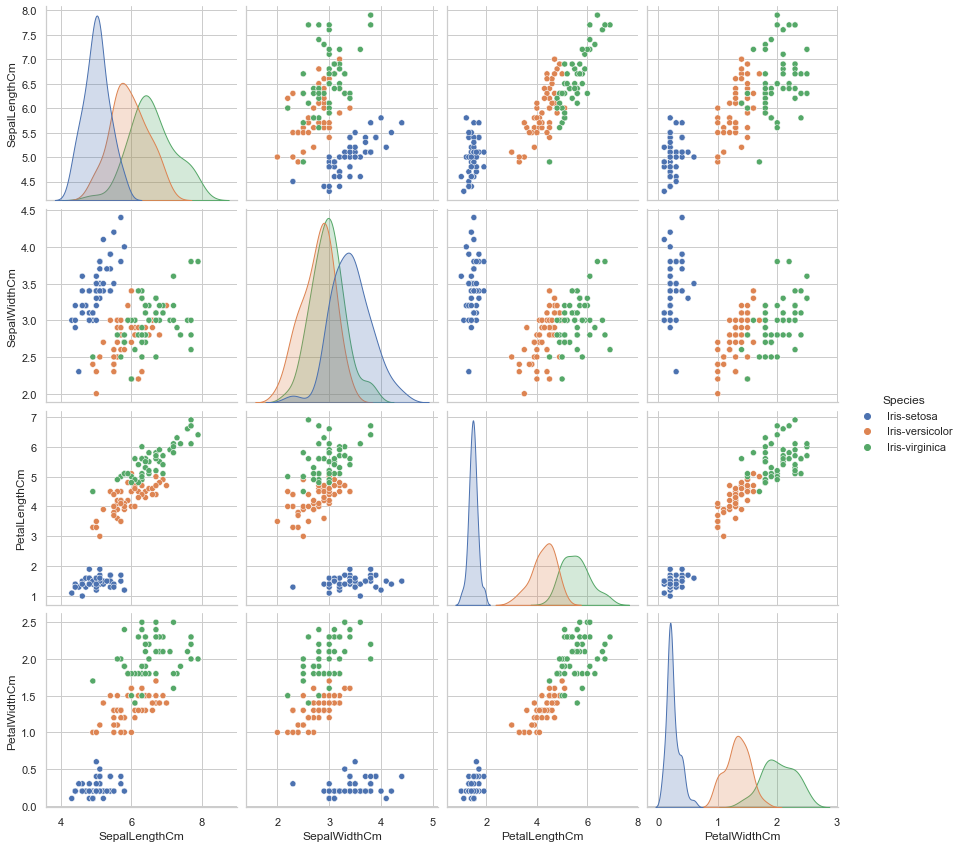

In [89]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",height=3);
plt.show()

## <span style='color:#BE36B3'>Violin Plot,it shows the distribution of quantative data 

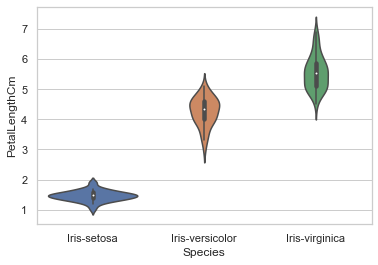

In [90]:
sns.violinplot(x="Species",y="PetalLengthCm",data=df)
plt.show()#C197FF

## <span style='color:#C197FF'>Importing KMeans From Sklearn

In [91]:
from sklearn.cluster import KMeans
wcss=[]

## <span style='color:#4FFBDF'>WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster

In [92]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(input)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
    

680.8243999999996
152.36870647733915
78.94084142614601
57.34540931571815
46.535582051282034
38.93873974358975
34.190687924796634
29.90537429982511
27.927882157034986
25.955497086247092


## <span style='color:#3596B5'>Elbow Method to find out the Optimal Cluster

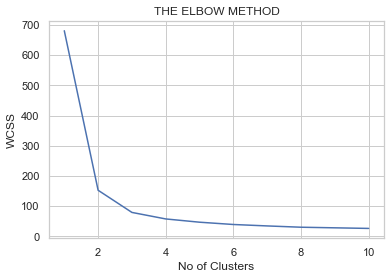

In [93]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel("WCSS")
plt.title('THE ELBOW METHOD')
plt.show()

## Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow method
### <span style='color:#845EC2'>The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K in this case it is 3

## <span style='color:#B25B00'> Creating KMeans object, Creating model

In [94]:
kmeans=KMeans(n_clusters=3,init='k-means++')
model=kmeans.fit_predict(input)


In [95]:
model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### Yes it Contains Some Noise

In [96]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## <span style='color:#008BC8'>Visualising the clusters (2D)


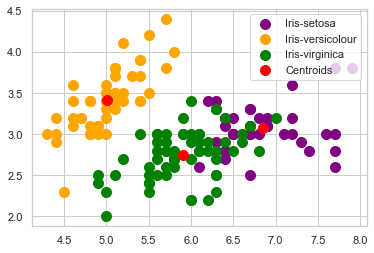

In [97]:
plt.scatter(input[model == 0, 0], input[model == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(input[model == 1, 0], input[model == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(input[model == 2, 0], input[model == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

## <span style='color:#00C0A3'>Visualising the clusters (3D)


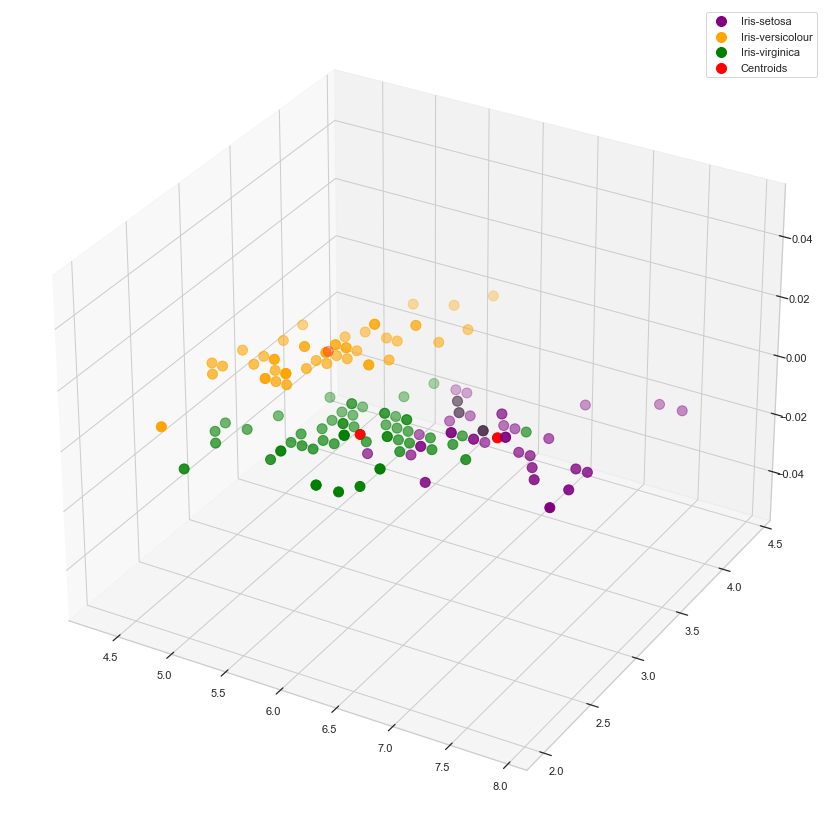

In [98]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(input[model == 0, 0], input[model == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(input[model == 1, 0], input[model == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(input[model == 2, 0], input[model == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

### END TASK....Thank You